# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Load the dataset


In [104]:
df = pd.read_csv('Datasets/Traffic_Jams.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
6319,10:30:00 AM,9,Thursday,26,16,13,16,71,normal
6320,8:00:00 PM,9,Thursday,72,25,10,27,134,high
6321,9:00:00 PM,9,Thursday,107,13,14,28,162,high
6322,9:30:00 PM,9,Thursday,106,18,13,27,164,high


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [106]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [107]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}\n") 

'Time': ['12:00:00 AM' '12:15:00 AM' '12:30:00 AM' '12:45:00 AM' '1:00:00 AM'
 '1:15:00 AM' '1:30:00 AM' '1:45:00 AM' '2:00:00 AM' '2:15:00 AM'
 '2:30:00 AM' '2:45:00 AM' '3:00:00 AM' '3:15:00 AM' '3:30:00 AM'
 '3:45:00 AM' '4:00:00 AM' '4:15:00 AM' '4:30:00 AM' '4:45:00 AM'
 '5:00:00 AM' '5:15:00 AM' '5:30:00 AM' '5:45:00 AM' '6:00:00 AM'
 '6:15:00 AM' '6:30:00 AM' '6:45:00 AM' '7:00:00 AM' '7:15:00 AM'
 '7:30:00 AM' '7:45:00 AM' '8:00:00 AM' '8:15:00 AM' '8:30:00 AM'
 '8:45:00 AM' '9:00:00 AM' '9:15:00 AM' '9:30:00 AM' '9:45:00 AM'
 '10:00:00 AM' '10:15:00 AM' '10:30:00 AM' '10:45:00 AM' '11:00:00 AM'
 '11:15:00 AM' '11:30:00 AM' '11:45:00 AM' '12:00:00 PM' '12:15:00 PM'
 '12:30:00 PM' '12:45:00 PM' '1:00:00 PM' '1:15:00 PM' '1:30:00 PM'
 '1:45:00 PM' '2:00:00 PM' '2:15:00 PM' '2:30:00 PM' '2:45:00 PM'
 '3:00:00 PM' '3:15:00 PM' '3:30:00 PM' '3:45:00 PM' '4:00:00 PM'
 '4:15:00 PM' '4:30:00 PM' '4:45:00 PM' '5:00:00 PM' '5:15:00 PM'
 '5:30:00 PM' '5:45:00 PM' '6:00:00 PM' '6:15:00 PM'

In [108]:
df.describe()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


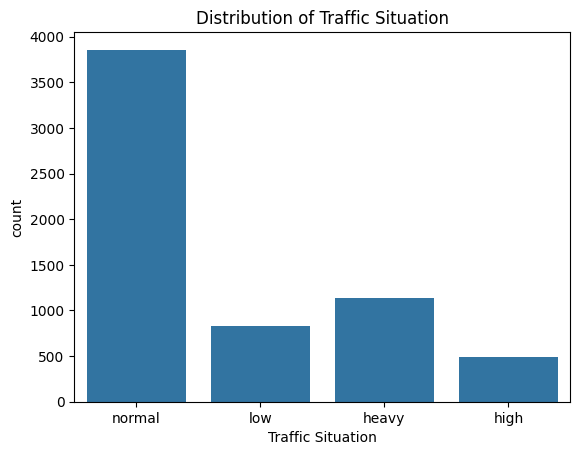

In [109]:

sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.show()


In [110]:
traffic_dist = df['Traffic Situation'].value_counts()
print(traffic_dist)


# Compute the correlation matrix for numerical features
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix for numerical features
correlation_matrix = numeric_df.corr()

correlation_matrix

Traffic Situation
normal    3858
heavy     1137
low        834
high       495
Name: count, dtype: int64


,Date,CarCount,BikeCount,BusCount,TruckCount,Total
Date,1.000000,-0.010507,-0.001985,-0.006166,0.021137,-0.006041
CarCount,-0.010507,1.000000,0.705941,0.664491,-0.583984,0.971386
BikeCount,-0.001985,0.705941,1.000000,0.581289,-0.585670,0.779261
BusCount,-0.006166,0.664491,0.581289,1.000000,-0.533847,0.763496
TruckCount,0.021137,-0.583984,-0.585670,-0.533847,1.000000,-0.508179
Total,-0.006041,0.971386,0.779261,0.763496,-0.508179,1.000000


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [111]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation


In [112]:
df_processed = df.copy()

# using Label Encoding
label_encoder = LabelEncoder()
df_processed['Day of the week'] = label_encoder.fit_transform(df_processed['Day of the week'])

# One-Hot Encode Traffic Situation
df_processed = pd.get_dummies(df_processed, columns=['Traffic Situation'], drop_first=True)

df_processed.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation_high,Traffic Situation_low,Traffic Situation_normal
0,12:00:00 AM,10,5,13,2,2,24,41,False,False,True
1,12:15:00 AM,10,5,14,1,1,36,52,False,False,True
2,12:30:00 AM,10,5,10,2,2,32,46,False,False,True
3,12:45:00 AM,10,5,10,2,2,36,50,False,False,True
4,1:00:00 AM,10,5,11,2,1,34,48,False,False,True


In [113]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Time                      6324 non-null   object
 1   Date                      6324 non-null   int64 
 2   Day of the week           6324 non-null   int64 
 3   CarCount                  6324 non-null   int64 
 4   BikeCount                 6324 non-null   int64 
 5   BusCount                  6324 non-null   int64 
 6   TruckCount                6324 non-null   int64 
 7   Total                     6324 non-null   int64 
 8   Traffic Situation_high    6324 non-null   bool  
 9   Traffic Situation_low     6324 non-null   bool  
 10  Traffic Situation_normal  6324 non-null   bool  
dtypes: bool(3), int64(7), object(1)
memory usage: 413.9+ KB


In [114]:
# Replace '-1' with NaN for easier handling
df_processed['Time'] = df_processed['Time'].replace('-1', np.nan)

# drop rows with NaN in 'Time' if existed
df_processed.dropna(subset=['Time'], inplace=True)

# Convert 'Time' to a numerical feature (extract hour)
df_processed['Time'] = pd.to_datetime(df_processed['Time'], format='%I:%M:%S %p').dt.hour

In [115]:

scaler = StandardScaler()

# Selecting numerical columns for scaling
numerical_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount']

# Apply scaling
df_processed[numerical_columns] = scaler.fit_transform(df_processed[numerical_columns])
df_processed.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation_high,Traffic Situation_low,Traffic Situation_normal
0,-1.638451,-0.674765,5,-1.159175,-0.881214,-0.857050,0.498124,41,False,False,True
1,-1.638451,-0.674765,5,-1.136604,-0.969218,-0.938226,1.617112,52,False,False,True
2,-1.638451,-0.674765,5,-1.226890,-0.881214,-0.857050,1.244116,46,False,False,True
3,-1.638451,-0.674765,5,-1.226890,-0.881214,-0.857050,1.617112,50,False,False,True
4,-1.495923,-0.674765,5,-1.204319,-0.881214,-0.938226,1.430614,48,False,False,True


In [116]:
# Total column is the sum of CarCount, BikeCount, BusCount, and TruckCount, so it's redundant
df_processed.drop(['Total'], axis=1, inplace=True)

# Final dataframe is ready for modeling
df_processed


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Traffic Situation_high,Traffic Situation_low,Traffic Situation_normal
0,-1.638451,-0.674765,5,-1.159175,-0.881214,-0.857050,0.498124,False,False,True
1,-1.638451,-0.674765,5,-1.136604,-0.969218,-0.938226,1.617112,False,False,True
2,-1.638451,-0.674765,5,-1.226890,-0.881214,-0.857050,1.244116,False,False,True
3,-1.638451,-0.674765,5,-1.226890,-0.881214,-0.857050,1.617112,False,False,True
4,-1.495923,-0.674765,5,-1.204319,-0.881214,-0.938226,1.430614,False,False,True
...,...,...,...,...,...,...,...,...,...,...
6319,-0.213162,-0.786419,4,-0.865746,0.350849,0.035890,-0.247868,False,False,True
6320,1.212127,-0.786419,4,0.172545,1.142889,-0.207639,0.777871,True,False,False
6321,1.354656,-0.786419,4,0.962549,0.086836,0.117066,0.871120,True,False,False
6322,1.354656,-0.786419,4,0.939977,0.526858,0.035890,0.777871,True,False,False


In [117]:
df_processed['Time'].unique()

array([-1.63845143, -1.49592252, -1.3533936 , -1.21086469, -1.06833578,
       -0.92580687, -0.78327796, -0.64074904, -0.49822013, -0.35569122,
       -0.21316231, -0.0706334 ,  0.07189551,  0.21442443,  0.35695334,
        0.49948225,  0.64201116,  0.78454007,  0.92706898,  1.0695979 ,
        1.21212681,  1.35465572,  1.49718463,  1.63971354])

In [118]:
def is_rush_hour_scaled(scaled_hour):
    # Assuming the mean hour is around midday and rush hours are centered around -1 to 0.5 in scaled terms
    if (-1.2 <= scaled_hour <= -0.5) or (0.5 <= scaled_hour <= 1.2):
        return 1
    else:
        return 0

# creating the Rush_Hour column
df_processed['Rush_Hour'] = df_processed['Time'].apply(is_rush_hour_scaled)

df_processed['Rush_Hour'].value_counts()

Rush_Hour
0    4239
1    2085
Name: count, dtype: int64

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

In [119]:
# Summing the counts of each Traffic Situation
traffic_situation_counts = df_processed[['Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal']].sum()

# Converting it to a DataFrame for easier plotting
traffic_situation_counts_df = traffic_situation_counts.reset_index()
traffic_situation_counts_df.columns = ['Traffic Situation', 'Count']


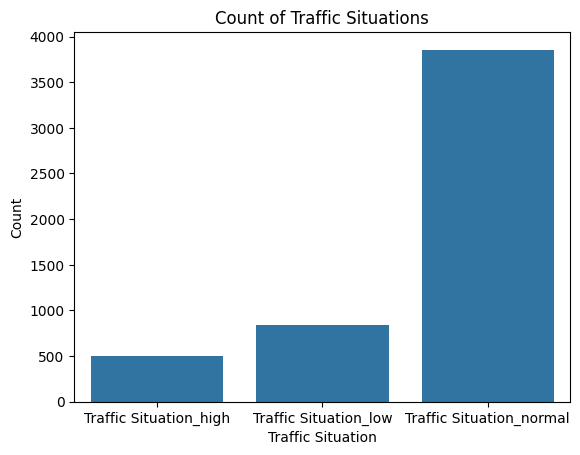

In [120]:

sns.barplot(data=traffic_situation_counts_df, x='Traffic Situation', y='Count')
plt.title('Count of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

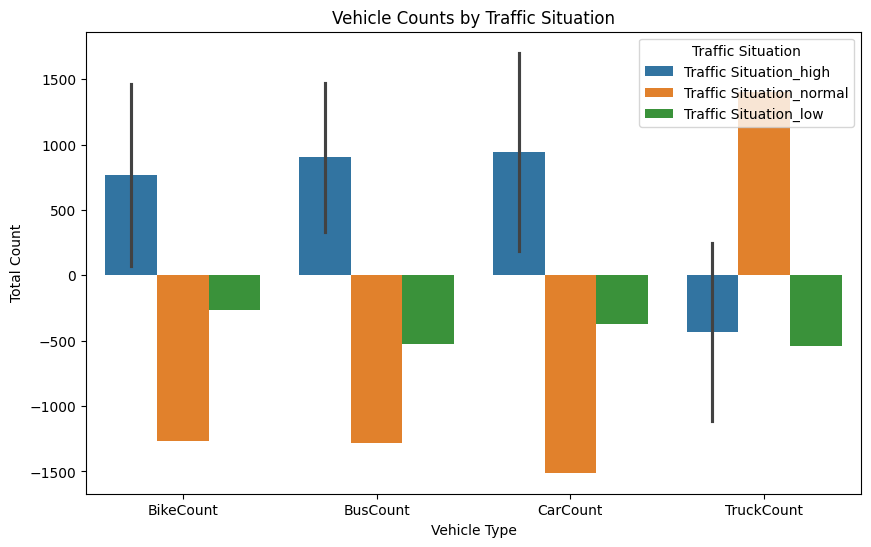

In [121]:
# Melting the DataFrame to have a long-form DataFrame suitable for sns
df_melted = df_processed.melt(id_vars=['Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal'], 
                              value_vars=['CarCount', 'BikeCount', 'BusCount', 'TruckCount'],
                              var_name='Vehicle Type', value_name='Count')

# Summing up the counts based on Traffic Situation and Vehicle Type
df_grouped = df_melted.groupby(['Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal', 'Vehicle Type']).sum().reset_index()

df_grouped['Traffic Situation'] = df_grouped[['Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal']].idxmax(axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='Vehicle Type', y='Count', hue='Traffic Situation')
plt.title('Vehicle Counts by Traffic Situation')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Count')
plt.show()

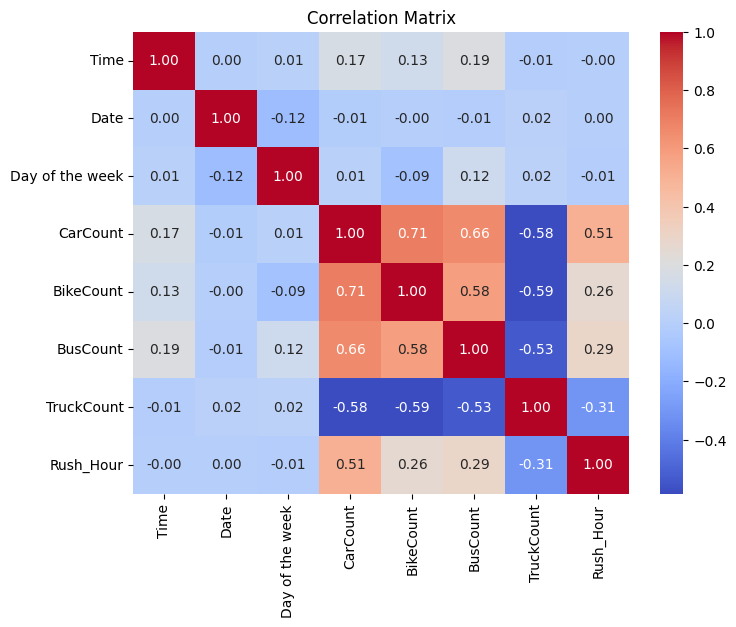

In [122]:
numeric_df = df_processed.select_dtypes(include=[float, int])

# Compute the matrix for numerical features
correlation_matrix = numeric_df.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [123]:
from sklearn.model_selection import train_test_split

# Define Features and Target
X = df_processed.drop(['Traffic Situation_high', 'Traffic Situation_low', 'Traffic Situation_normal'], axis=1)
y = df_processed['Traffic Situation_normal'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForest as a Bagging Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

### Evaluate the model performance

In [125]:
y_pred_rf = rf_clf.predict(X_test)
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf))


Accuracy of Random Forest: 0.8711462450592885


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Model
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluate the model performance

In [127]:
y_pred_gb = gb_clf.predict(X_test)
print("Accuracy of Gradient Boosting:", accuracy_score(y_test, y_pred_gb))


Accuracy of Gradient Boosting: 0.9075098814229249


## Stacking Classifier
- Combine the previous classifiers as the base models using a Stacking Classifier.
- Define meta-learner (LogisticRegression)

In [128]:
meta_learner = LogisticRegression()
stack_clf = StackingClassifier(estimators=[
    ('random_forest', rf_clf),
    ('gradient_boost', gb_clf)
], final_estimator=meta_learner)




### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [129]:
stack_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('gradient_boost',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [130]:

y_pred_stack = stack_clf.predict(X_test)
print("Accuracy of Stacking Classifier:", accuracy_score(y_test, y_pred_stack))

Accuracy of Stacking Classifier: 0.9185770750988143


In [131]:

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, y_pred_stack))

print("Stacking Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.83      0.83       471
        True       0.90      0.89      0.90       794

    accuracy                           0.87      1265
   macro avg       0.86      0.86      0.86      1265
weighted avg       0.87      0.87      0.87      1265

Random Forest Confusion Matrix:
[[393  78]
 [ 85 709]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.87      0.88       471
        True       0.92      0.93      0.93       794

    accuracy                           0.91      1265
   macro avg       0.90      0.90      0.90      1265
weighted avg       0.91      0.91      0.91      1265

Gradient Boosting Confusion Matrix:
[[411  60]
 [ 57 737]]

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.90      0.89       471


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

1. The features that stood out as most important included `CarCount`, `BikeCount`, and `Total`. These features directly correlate with traffic conditions. The presence of more vehicles typically leads to a higher likelihood of traffic situations being classified as heavy or high.

2. Yes, I created a Rush_Hour feature based on the scaled Time variable. This improved the model's ability to predict traffic patterns during peak times, enhancing overall performance, I also ensured to encode categorical variables and scale numerical ones. This preprocessing step was crucial in enhancing the model's performance, by ensuring that all features were on a consistent scale. 

3. The ensemble methods selected were Random Forest, Gradient Boosting, and Stacking Classifier. Ensemble methods like these combine multiple models to reduce overfitting, improve accuracy, and handle complex relationships within the data better than single models. The Stacking Classifier performed the best due to its ability to combine the strengths of Random Forest and Gradient Boosting, leveraging their diverse approaches to prediction.

4. 
- Metrics Used: Precision, recall, f1-score, accuracy, and confusion matrix.
- Insights:
    - Random Forest: 88% accuracy; solid performance but slightly lower recall for the True class.
    - Gradient Boosting: 91% accuracy; improved precision and recall over Random Forest.
    - Stacking Classifier: Best performer with 91% accuracy; effectively combines strengths of other models, leading to the highest precision and recall.
- The Stacking Classifier provided the best overall performance by leveraging the combined strengths of the individual models